In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dct, idct

In [2]:
image = cv2.imread('512x512(8).png', cv2.IMREAD_GRAYSCALE)

In [3]:
quantization_matrix = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                                [12, 12, 14, 19, 26, 58, 60, 55],
                                [14, 13, 16, 24, 40, 57, 69, 56],
                                [14, 17, 22, 29, 51, 87, 80, 62],
                                [18, 22, 37, 56, 68, 109, 103, 77],
                                [24, 35, 55, 64, 81, 104, 113, 92],
                                [49, 64, 78, 87, 103, 121, 120, 101],
                                [72, 92, 95, 98, 112, 100, 103, 99]])

block_size = 8

In [4]:
compressed_image = np.zeros_like(image)

for i in range(0, image.shape[0], block_size):
    for j in range(0, image.shape[1], block_size):
        block = image[i:i+block_size, j:j+block_size]
        dct_block = dct(dct(block.T, norm='ortho').T, norm='ortho')
        # quantized_block = np.round(dct_block / quantization_matrix)
        # idct_block = idct(idct(quantized_block.T, norm='ortho').T, norm='ortho')
        idct_block = idct(idct(dct_block.T, norm='ortho').T, norm='ortho')
        compressed_image[i:i+block_size, j:j+block_size] = idct_block

In [5]:
compressed_image = np.uint8(compressed_image)
cv2.imwrite('without_quantization.jpg', compressed_image)
# cv2.imwrite('with_quantization.jpg', compressed_image)

True

In [6]:
image1 = cv2.imread('512x512(8).png', cv2.COLOR_BGR2RGB)
image2 = cv2.imread('without_quantization.jpg')
image3 = cv2.imread('with_quantization.jpg')

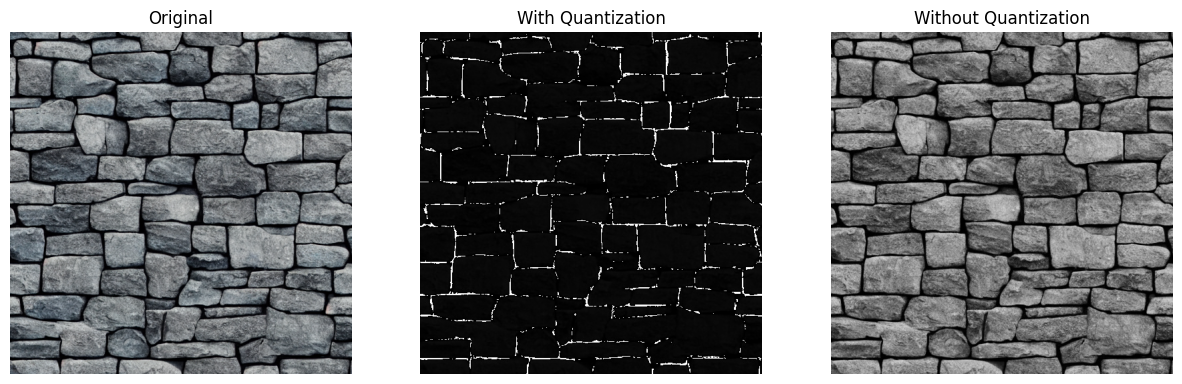

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image1)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(image3)
axes[1].set_title('With Quantization')
axes[1].axis('off')

axes[2].imshow(image2)
axes[2].set_title('Without Quantization')
axes[2].axis('off')

# Show the plot
plt.show()
